In [3]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

/home/andres/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
ndvi_path = '../madrid/sentinel/20230824T110619_StudyArea.tif'
lst_path = '../madrid/LST_StudyArea.tif'

In [4]:
# Open NDVI file
with rasterio.open(ndvi_path) as src:
    red = src.read(4)
    nir = src.read(8)
    meta = src.meta

# Calculate NDVI
ndvi = (nir - red) / (nir + red)

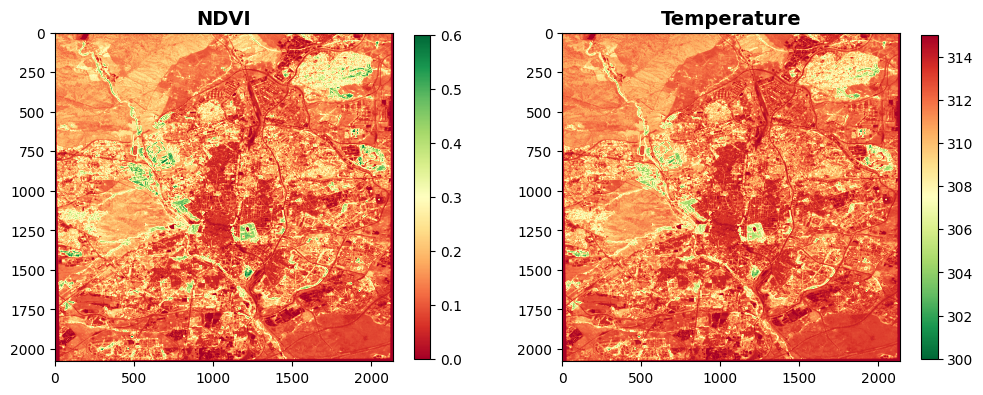

In [5]:
# Estimate temperature using NDVI
temp = -21.85 * ndvi + 314.9

# Create a color ramp for NDVI
ndvi_cmap = plt.cm.RdYlGn

# Plot NDVI and temperature side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Plot NDVI
im1 = ax1.imshow(ndvi, cmap=ndvi_cmap, vmin=0, vmax=0.6)
ax1.set_title('NDVI', fontweight='bold', fontsize=14)
fig.colorbar(im1, ax=ax1, shrink=0.7)

# Plot temperature
im2 = ax2.imshow(temp, cmap=ndvi_cmap.reversed(), vmin=300, vmax=315)
ax2.set_title('Temperature', fontweight='bold', fontsize=14)
fig.colorbar(im2, ax=ax2, shrink=0.7)

plt.show()

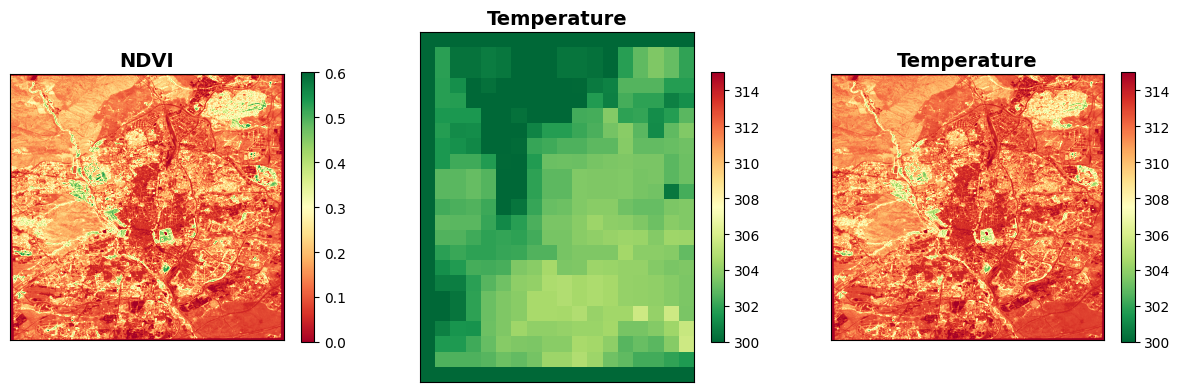

In [8]:
# Plot NDVI and temperature side by side
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Plot NDVI
vmin, vmax = 0, 0.6
ndvi_subset = ndvi #ndvi[int(0.75 * ndvi.shape[0]):, int(0.75 * ndvi.shape[1]):]
im1 = axs[0].imshow(ndvi_subset, cmap=ndvi_cmap, vmin=vmin, vmax=vmax)
axs[0].set_title('NDVI', fontweight='bold', fontsize=14)
axs[0].set_xticks([])
axs[0].set_yticks([])
fig.colorbar(im1, ax=axs[0], shrink=0.7)

# Plot temperature
with rasterio.open(lst_path) as src:
    original_temp = src.read(1)

vmin, vmax = 300, 315
temp_subset = original_temp #original_temp #[int(0.75 * original_temp.shape[0]):, int(0.75 * original_temp.shape[1]):]
im3 = axs[1].imshow(temp_subset, cmap=ndvi_cmap.reversed(), vmin=vmin, vmax=vmax)
axs[1].set_title('Temperature', fontweight='bold', fontsize=14)
axs[1].set_xticks([])
axs[1].set_yticks([])
fig.colorbar(im3, ax=axs[1], shrink=0.7)



# Plot temperature
vmin, vmax = 300, 315
temp_subset = temp #temp[int(0.75 * temp.shape[0]):, int(0.75 * temp.shape[1]):]
im2 = axs[2].imshow(temp_subset, cmap=ndvi_cmap.reversed(), vmin=vmin, vmax=vmax)
axs[2].set_title('Temperature', fontweight='bold', fontsize=14)
axs[2].set_xticks([])
axs[2].set_yticks([])
fig.colorbar(im2, ax=axs[2], shrink=0.7)

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.2)

plt.show()